In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 223 images
Image examples: 
kirkalti_resized.jpg


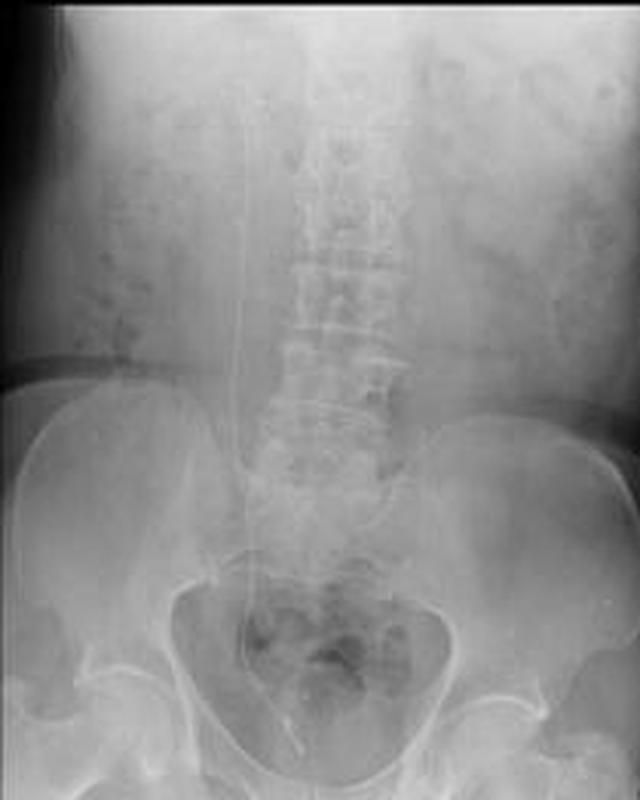

kirkbes_resized.jpg


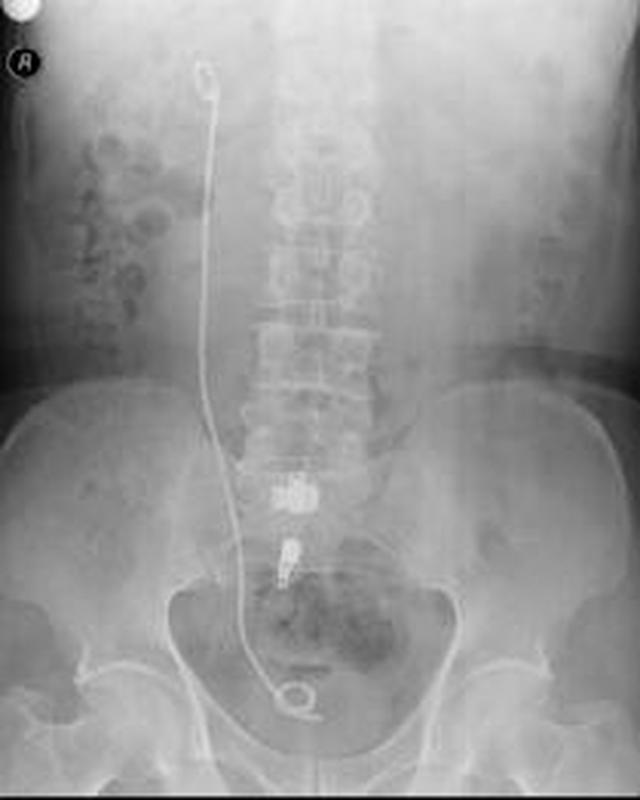

In [26]:
folder = "../keras/dataset"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=64, height=80))

In [27]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append((_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 64
image_height = 80
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 2

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((3, 120, 160))
    x = x.reshape((3, 20, 16))
    # Normalize
    x = (x - 128.0) / 128.0
    print(x)
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 223
[[[-0.75      -0.75      -0.75      -0.3046875 -0.3046875 -0.3046875
    0.1015625  0.1015625  0.1015625  0.2734375  0.2734375  0.2734375
    0.3125     0.3125     0.3125     0.390625 ]
  [ 0.390625   0.390625   0.4765625  0.4765625  0.4765625  0.5625
    0.5625     0.5625     0.59375    0.59375    0.59375    0.6875
    0.6875     0.6875     0.65625    0.65625  ]
  [ 0.65625    0.6953125  0.6953125  0.6953125  0.5859375  0.5859375
    0.5859375  0.5        0.5        0.5        0.4140625  0.4140625
    0.4140625  0.328125   0.328125   0.328125 ]
  [-0.7109375 -0.7109375 -0.7109375 -0.2578125 -0.2578125 -0.2578125
    0.0703125  0.0703125  0.0703125  0.1484375  0.1484375  0.1484375
    0.2734375  0.2734375  0.2734375  0.4765625]
  [ 0.4765625  0.4765625  0.625      0.625      0.625      0.59375
    0.59375    0.59375    0.5625     0.5625     0.5625     0.7109375
    0.7109375  0.7109375  0.65625    0.65625  ]
  [ 0.65625    0.6796875  0.6796875  0.6796875  0.51

[[[-0.90625   -0.90625   -0.90625   -0.6875    -0.6875    -0.6875
   -0.25      -0.25      -0.25      -0.6953125 -0.6953125 -0.6953125
   -0.75      -0.75      -0.75      -0.703125 ]
  [-0.703125  -0.703125   0.         0.         0.         0.40625
    0.40625    0.40625    0.0703125  0.0703125  0.0703125  0.171875
    0.171875   0.171875  -0.3046875 -0.3046875]
  [-0.3046875 -0.4921875 -0.4921875 -0.4921875 -0.03125   -0.03125
   -0.03125   -0.65625   -0.65625   -0.65625   -0.9140625 -0.9140625
   -0.9140625 -0.9765625 -0.9765625 -0.9765625]
  [-0.8046875 -0.8046875 -0.8046875 -0.65625   -0.65625   -0.65625
   -0.1796875 -0.1796875 -0.1796875 -0.421875  -0.421875  -0.421875
   -0.1015625 -0.1015625 -0.1015625 -0.0859375]
  [-0.0859375 -0.0859375  0.2265625  0.2265625  0.2265625  0.4296875
    0.4296875  0.4296875  0.046875   0.046875   0.046875   0.1484375
    0.1484375  0.1484375 -0.0859375 -0.0859375]
  [-0.0859375 -0.375     -0.375     -0.375      0.0390625  0.0390625
    0.039062

[[[-0.703125  -0.703125  -0.703125  -0.359375  -0.359375  -0.359375
   -0.171875  -0.171875  -0.171875   0.078125   0.078125   0.078125
   -0.0546875 -0.0546875 -0.0546875 -0.09375  ]
  [-0.09375   -0.09375    0.4375     0.4375     0.4375     0.4375
    0.4375     0.4375     0.0625     0.0625     0.0625    -0.15625
   -0.15625   -0.15625   -0.03125   -0.03125  ]
  [-0.03125   -0.4765625 -0.4765625 -0.4765625 -0.5625    -0.5625
   -0.5625    -0.6484375 -0.6484375 -0.6484375 -0.640625  -0.640625
   -0.640625  -0.9375    -0.9375    -0.9375   ]
  [-0.375     -0.375     -0.375      0.15625    0.15625    0.15625
    0.3828125  0.3828125  0.3828125  0.3828125  0.3828125  0.3828125
    0.375      0.375      0.375      0.3203125]
  [ 0.3203125  0.3203125  0.4296875  0.4296875  0.4296875  0.40625
    0.40625    0.40625    0.3359375  0.3359375  0.3359375  0.3203125
    0.3203125  0.3203125  0.359375   0.359375 ]
  [ 0.359375  -0.03125   -0.03125   -0.03125   -0.390625  -0.390625
   -0.390625  -0.

[[[-0.734375  -0.734375  -0.734375  -0.0625    -0.0625    -0.0625
    0.421875   0.421875   0.421875   0.46875    0.46875    0.46875
    0.4609375  0.4609375  0.4609375  0.4453125]
  [ 0.4453125  0.4453125  0.4453125  0.4453125  0.4453125  0.4140625
    0.4140625  0.4140625  0.4453125  0.4453125  0.4453125  0.46875
    0.46875    0.46875    0.4609375  0.4609375]
  [ 0.4609375  0.390625   0.390625   0.390625   0.421875   0.421875
    0.421875   0.4375     0.4375     0.4375     0.4296875  0.4296875
    0.4296875  0.4453125  0.4453125  0.4453125]
  [-0.984375  -0.984375  -0.984375  -0.5546875 -0.5546875 -0.5546875
    0.0859375  0.0859375  0.0859375  0.2890625  0.2890625  0.2890625
    0.3046875  0.3046875  0.3046875  0.328125 ]
  [ 0.328125   0.328125   0.3046875  0.3046875  0.3046875  0.2265625
    0.2265625  0.2265625  0.3359375  0.3359375  0.3359375  0.375
    0.375      0.375      0.28125    0.28125  ]
  [ 0.28125    0.265625   0.265625   0.265625   0.1328125  0.1328125
    0.1328125

[[[ 0.21875    0.21875    0.21875    0.328125   0.328125   0.328125
    0.4765625  0.4765625  0.4765625  0.40625    0.40625    0.40625
    0.3359375  0.3359375  0.3359375  0.3359375]
  [ 0.3359375  0.3359375  0.328125   0.328125   0.328125   0.453125
    0.453125   0.453125   0.4296875  0.4296875  0.4296875  0.265625
    0.265625   0.265625   0.3046875  0.3046875]
  [ 0.3046875  0.359375   0.359375   0.359375   0.4453125  0.4453125
    0.4453125  0.453125   0.453125   0.453125   0.390625   0.390625
    0.390625   0.0859375  0.0859375  0.0859375]
  [ 0.25       0.25       0.25       0.2421875  0.2421875  0.2421875
    0.3203125  0.3203125  0.3203125  0.3671875  0.3671875  0.3671875
    0.3515625  0.3515625  0.3515625  0.3046875]
  [ 0.3046875  0.3046875  0.328125   0.328125   0.328125   0.4375
    0.4375     0.4375     0.4296875  0.4296875  0.4296875  0.265625
    0.265625   0.265625   0.328125   0.328125 ]
  [ 0.328125   0.3828125  0.3828125  0.3828125  0.3515625  0.3515625
    0.35156

[[[-0.078125  -0.078125  -0.078125   0.5        0.5        0.5
    0.4765625  0.4765625  0.4765625  0.4140625  0.4140625  0.4140625
    0.4375     0.4375     0.4375     0.390625 ]
  [ 0.390625   0.390625   0.34375    0.34375    0.34375    0.5078125
    0.5078125  0.5078125  0.5078125  0.5078125  0.5078125  0.3515625
    0.3515625  0.3515625  0.3359375  0.3359375]
  [ 0.3359375  0.4375     0.4375     0.4375     0.4453125  0.4453125
    0.4453125  0.4375     0.4375     0.4375     0.3203125  0.3203125
    0.3203125 -0.03125   -0.03125   -0.03125  ]
  [-0.1015625 -0.1015625 -0.1015625  0.40625    0.40625    0.40625
    0.4921875  0.4921875  0.4921875  0.4921875  0.4921875  0.4921875
    0.4296875  0.4296875  0.4296875  0.28125  ]
  [ 0.28125    0.28125    0.390625   0.390625   0.390625   0.4140625
    0.4140625  0.4140625  0.4296875  0.4296875  0.4296875  0.3515625
    0.3515625  0.3515625  0.390625   0.390625 ]
  [ 0.390625   0.40625    0.40625    0.40625    0.4921875  0.4921875
    0.492

[[[-0.9375    -0.9375    -0.9375    -0.125     -0.125     -0.125
    0.34375    0.34375    0.34375    0.421875   0.421875   0.421875
    0.4140625  0.4140625  0.4140625  0.3828125]
  [ 0.3828125  0.3828125  0.34375    0.34375    0.34375    0.4609375
    0.4609375  0.4609375  0.578125   0.578125   0.578125   0.421875
    0.421875   0.421875   0.3984375  0.3984375]
  [ 0.3984375  0.484375   0.484375   0.484375   0.390625   0.390625
    0.390625   0.46875    0.46875    0.46875    0.2265625  0.2265625
    0.2265625 -0.671875  -0.671875  -0.671875 ]
  [-0.9609375 -0.9609375 -0.9609375 -0.109375  -0.109375  -0.109375
    0.53125    0.53125    0.53125    0.5546875  0.5546875  0.5546875
    0.5        0.5        0.5        0.5546875]
  [ 0.5546875  0.5546875  0.4375     0.4375     0.4375     0.4296875
    0.4296875  0.4296875  0.5546875  0.5546875  0.5546875  0.4375
    0.4375     0.4375     0.4375     0.4375   ]
  [ 0.4375     0.5078125  0.5078125  0.5078125  0.5234375  0.5234375
    0.523437

[[[-0.6328125 -0.6328125 -0.6328125 -0.296875  -0.296875  -0.296875
   -0.0625    -0.0625    -0.0625     0.09375    0.09375    0.09375
    0.109375   0.109375   0.109375   0.1171875]
  [ 0.1171875  0.1171875  0.1796875  0.1796875  0.1796875  0.265625
    0.265625   0.265625   0.25       0.25       0.25       0.15625
    0.15625    0.15625    0.140625   0.140625 ]
  [ 0.140625   0.109375   0.109375   0.109375   0.         0.
    0.        -0.0703125 -0.0703125 -0.0703125 -0.2421875 -0.2421875
   -0.2421875 -0.546875  -0.546875  -0.546875 ]
  [-0.6640625 -0.6640625 -0.6640625 -0.296875  -0.296875  -0.296875
    0.015625   0.015625   0.015625   0.1640625  0.1640625  0.1640625
    0.234375   0.234375   0.234375   0.3046875]
  [ 0.3046875  0.3046875  0.34375    0.34375    0.34375    0.46875
    0.46875    0.46875    0.46875    0.46875    0.46875    0.359375
    0.359375   0.359375   0.34375    0.34375  ]
  [ 0.34375    0.2734375  0.2734375  0.2734375  0.171875   0.171875
    0.171875   0.00

[[[-0.140625  -0.140625  -0.140625   0.28125    0.28125    0.28125
    0.3046875  0.3046875  0.3046875  0.1953125  0.1953125  0.1953125
    0.3203125  0.3203125  0.3203125  0.4375   ]
  [ 0.4375     0.4375     0.6328125  0.6328125  0.6328125  0.796875
    0.796875   0.796875   0.78125    0.78125    0.78125    0.3671875
    0.3671875  0.3671875  0.1015625  0.1015625]
  [ 0.1015625  0.09375    0.09375    0.09375   -0.015625  -0.015625
   -0.015625  -0.296875  -0.296875  -0.296875  -0.4375    -0.4375
   -0.4375    -0.5703125 -0.5703125 -0.5703125]
  [-0.2265625 -0.2265625 -0.2265625 -0.015625  -0.015625  -0.015625
   -0.2578125 -0.2578125 -0.2578125 -0.3203125 -0.3203125 -0.3203125
   -0.046875  -0.046875  -0.046875   0.1875   ]
  [ 0.1875     0.1875     0.515625   0.515625   0.515625   0.625
    0.625      0.625      0.421875   0.421875   0.421875   0.0390625
    0.0390625  0.0390625  0.0625     0.0625   ]
  [ 0.0625     0.0625     0.0625     0.0625     0.0546875  0.0546875
    0.0546875

[[[-0.5859375 -0.5859375 -0.5859375 -0.0390625 -0.0390625 -0.0390625
    0.109375   0.109375   0.109375   0.1484375  0.1484375  0.1484375
    0.1484375  0.1484375  0.1484375  0.078125 ]
  [ 0.078125   0.078125   0.1484375  0.1484375  0.1484375  0.28125
    0.28125    0.28125    0.296875   0.296875   0.296875   0.234375
    0.234375   0.234375   0.1796875  0.1796875]
  [ 0.1796875  0.1640625  0.1640625  0.1640625  0.109375   0.109375
    0.109375  -0.0078125 -0.0078125 -0.0078125 -0.1796875 -0.1796875
   -0.1796875 -0.5546875 -0.5546875 -0.5546875]
  [-0.4453125 -0.4453125 -0.4453125  0.125      0.125      0.125
    0.2890625  0.2890625  0.2890625  0.3125     0.3125     0.3125
    0.296875   0.296875   0.296875   0.2890625]
  [ 0.2890625  0.2890625  0.359375   0.359375   0.359375   0.421875
    0.421875   0.421875   0.4140625  0.4140625  0.4140625  0.328125
    0.328125   0.328125   0.328125   0.328125 ]
  [ 0.328125   0.359375   0.359375   0.359375   0.3046875  0.3046875
    0.3046875 

    0.234375  -0.046875  -0.046875  -0.046875 ]]]
[[[-0.8359375 -0.8359375 -0.8359375 -0.3359375 -0.3359375 -0.3359375
   -0.0859375 -0.0859375 -0.0859375  0.4296875  0.4296875  0.4296875
    0.3984375  0.3984375  0.3984375  0.328125 ]
  [ 0.328125   0.328125   0.453125   0.453125   0.453125   0.3671875
    0.3671875  0.3671875  0.40625    0.40625    0.40625    0.4453125
    0.4453125  0.4453125  0.3828125  0.3828125]
  [ 0.3828125  0.3203125  0.3203125  0.3203125  0.265625   0.265625
    0.265625   0.1796875  0.1796875  0.1796875 -0.2890625 -0.2890625
   -0.2890625 -0.640625  -0.640625  -0.640625 ]
  [-0.875     -0.875     -0.875     -0.78125   -0.78125   -0.78125
   -0.4921875 -0.4921875 -0.4921875  0.0234375  0.0234375  0.0234375
    0.2421875  0.2421875  0.2421875  0.2578125]
  [ 0.2578125  0.2578125  0.375      0.375      0.375      0.3515625
    0.3515625  0.3515625  0.390625   0.390625   0.390625   0.4296875
    0.4296875  0.4296875  0.3125     0.3125   ]
  [ 0.3125     0.179687

[[[-0.921875  -0.921875  -0.921875  -0.484375  -0.484375  -0.484375
   -0.125     -0.125     -0.125      0.0234375  0.0234375  0.0234375
    0.1171875  0.1171875  0.1171875  0.203125 ]
  [ 0.203125   0.203125   0.2109375  0.2109375  0.2109375  0.25
    0.25       0.25       0.25       0.25       0.25       0.2265625
    0.2265625  0.2265625  0.2265625  0.2265625]
  [ 0.2265625  0.1875     0.1875     0.1875     0.1171875  0.1171875
    0.1171875 -0.0234375 -0.0234375 -0.0234375 -0.515625  -0.515625
   -0.515625  -0.921875  -0.921875  -0.921875 ]
  [-0.90625   -0.90625   -0.90625   -0.4453125 -0.4453125 -0.4453125
    0.109375   0.109375   0.109375   0.3125     0.3125     0.3125
    0.421875   0.421875   0.421875   0.484375 ]
  [ 0.484375   0.484375   0.515625   0.515625   0.515625   0.546875
    0.546875   0.546875   0.5546875  0.5546875  0.5546875  0.5625
    0.5625     0.5625     0.578125   0.578125 ]
  [ 0.578125   0.515625   0.515625   0.515625   0.390625   0.390625
    0.390625   0

   -0.75      -0.9765625 -0.9765625 -0.9765625]]]
[[[-0.9765625 -0.9765625 -0.9765625 -0.5078125 -0.5078125 -0.5078125
    0.046875   0.046875   0.046875   0.4375     0.4375     0.4375
    0.46875    0.46875    0.46875    0.375    ]
  [ 0.375      0.375      0.453125   0.453125   0.453125   0.40625
    0.40625    0.40625    0.390625   0.390625   0.390625   0.515625
    0.515625   0.515625   0.40625    0.40625  ]
  [ 0.40625    0.171875   0.171875   0.171875   0.296875   0.296875
    0.296875   0.5078125  0.5078125  0.5078125  0.453125   0.453125
    0.453125   0.28125    0.28125    0.28125  ]
  [-0.9453125 -0.9453125 -0.9453125 -0.5       -0.5       -0.5
   -0.0390625 -0.0390625 -0.0390625  0.2578125  0.2578125  0.2578125
    0.40625    0.40625    0.40625    0.3671875]
  [ 0.3671875  0.3671875  0.3828125  0.3828125  0.3828125  0.3203125
    0.3203125  0.3203125  0.40625    0.40625    0.40625    0.3984375
    0.3984375  0.3984375  0.3359375  0.3359375]
  [ 0.3359375  0.1796875  0.179687

    0.4296875  0.2265625  0.2265625  0.2265625]]]
[[[-0.6171875 -0.6171875 -0.6171875 -0.5       -0.5       -0.5
   -0.4765625 -0.4765625 -0.4765625 -0.40625   -0.40625   -0.40625
   -0.2734375 -0.2734375 -0.2734375 -0.3828125]
  [-0.3828125 -0.3828125 -0.3828125 -0.3828125 -0.3828125 -0.21875
   -0.21875   -0.21875   -0.1328125 -0.1328125 -0.1328125 -0.0703125
   -0.0703125 -0.0703125 -0.078125  -0.078125 ]
  [-0.078125  -0.234375  -0.234375  -0.234375  -0.2890625 -0.2890625
   -0.2890625 -0.3359375 -0.3359375 -0.3359375 -0.421875  -0.421875
   -0.421875  -0.4453125 -0.4453125 -0.4453125]
  [-0.6015625 -0.6015625 -0.6015625 -0.421875  -0.421875  -0.421875
   -0.390625  -0.390625  -0.390625  -0.25      -0.25      -0.25
   -0.1015625 -0.1015625 -0.1015625 -0.078125 ]
  [-0.078125  -0.078125  -0.1640625 -0.1640625 -0.1640625 -0.0625
   -0.0625    -0.0625     0.0078125  0.0078125  0.0078125  0.1015625
    0.1015625  0.1015625  0.0390625  0.0390625]
  [ 0.0390625 -0.046875  -0.046875  -0.0

[[[-0.609375  -0.609375  -0.609375  -0.1640625 -0.1640625 -0.1640625
   -0.03125   -0.03125   -0.03125   -0.328125  -0.328125  -0.328125
   -0.1640625 -0.1640625 -0.1640625 -0.0859375]
  [-0.0859375 -0.0859375 -0.1015625 -0.1015625 -0.1015625  0.03125
    0.03125    0.03125    0.1640625  0.1640625  0.1640625  0.0625
    0.0625     0.0625     0.0078125  0.0078125]
  [ 0.0078125  0.078125   0.078125   0.078125  -0.015625  -0.015625
   -0.015625  -0.0078125 -0.0078125 -0.0078125  0.015625   0.015625
    0.015625  -0.1328125 -0.1328125 -0.1328125]
  [-0.5625    -0.5625    -0.5625    -0.1015625 -0.1015625 -0.1015625
    0.078125   0.078125   0.078125  -0.0390625 -0.0390625 -0.0390625
   -0.03125   -0.03125   -0.03125    0.1171875]
  [ 0.1171875  0.1171875 -0.046875  -0.046875  -0.046875   0.265625
    0.265625   0.265625   0.375      0.375      0.375      0.28125
    0.28125    0.28125    0.1953125  0.1953125]
  [ 0.1953125  0.25       0.25       0.25       0.2265625  0.2265625
    0.226562

In [28]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 178, Val set size: 23, Test set size: 22


In [40]:
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64,80,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

TypeError: fit() got an unexpected keyword argument 'epochs'